<h1 style="text-align:center">NYC Open Data Week at TIQC</h1>
<h2 style="text-align:center">Introduction to Machine Learning</h2>

<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" width="200px" height="200px" align="center" >

<img src="https://opendata.cityofnewyork.us/wp-content/themes/opendata-wp/assets/img/nyc-open-data-logo.svg" width="200px" height="200px" align="left" >

<img src="https://techincubatorqc.com/wp-content/uploads/2020/02/cropped-TechIncubator_web_black_red_logo-1.png" width="200px" height="200px" align="right" padding="top" >

Machine learning is sometimes portrayed as magical or arcane especially since a computer "learning" from data seems rather sci-fi. In reality, machine learning (ML), also known as statistical learning, are probability models that vary in complexity. Some models, such as ordinary least squares regression or k nearest neighbors, are surprisingly simple whereas neural networks are very complex.

ML algorithms estimate _parameters_ from data. These parameters model an understanding of the data. For example, if you've used an iOS device you've learned some parameters on how to use smartphones **in general.** Thus, your generalized knowledge also transfer over to Android or other mobile operating systems even if there are some imperfections.

Our goal for this workshop is to **introduce ML rigorously but without being insurmountably difficult**. Thus, we won't get bogged down with maths and proofs but we also won't just fit ten algorithms and compare performances. We will focus on two simple algorithms, _k nearest neighbors_ and _k means_. Through these algorithms you will learn some of the basics of how ML is approached and observe how researchers may tackle using these models. We'll use a real life data set straight from the city's Open Data initative as an example of a project that has real life applications.

We ask of you not to panic if any of the code or concepts seem too difficult. You definitely don't have to understand any of the plotting or cleaning code. Instead, just have fun and take whatever knowledge you can from our seminar!

# Table of Contents

<div class = "alert alert-info">

1. [Categories of machine learning](#mlcats)

2. [The clean heat data set](#thedata)

3. [Loading the data](#loadingdata)

4. [Data cleaning](#cleaning)

5. [Supervised machine learning](#supervised)

6. [Unsupervised Machine Learning](#unsupervised)

7. [Conclusion](#conclusion)


</div>


# Categories of Machine Learning<a id=mlcats></a>

The primary difference between **supervised learning** and **unsupervised learning** is that the former learns from **labeled data**. Labeled data simply means that a desired outcome is available and known. For example, a data set on customer churn would contain various variables pertaining to customers as well if they churned. Labeled data used for training a model to distinguish cats would have labels for cats. Unlabeled data is—you guessed it!—unlabeled!

Labels act as the "supervisor" that guides or tests supervised models. Linear regressions are trained so that the error (residual sum of squares) between the model and the relationship from the data is minimized. In other words, the true output guides linear models. Supervised models are easy to check as well because we know the expected result. As a result, supervised learning is more prevalent than unsupervised ML. Supervised machine learning algorithms include linear models, decision trees, random forests, support vector machines, k nearest neighbors, as well as some neural networks.

Unsupervised models learn from the properties of the data without being guided in any way. For example, an algorithm may naturally cluster data into a number of groups without knowing anything about the group memberships beforehand. Thus, these models pick up patterns or reduce data based on the data themselves rather than based on a predefined relationship. K means clustering, principal component analysis, DBSCAN, expectation–maximization, as well as neural networks.

**Semi-supervised learning** falls between both model types. Semi-supervised models are characterized by the presence of some labels but not a full set.

**Reinforcement learning** simulates how an agent would accomplish an objective such as winning a video game. Self driving cars or A.I. that learns how to play games like [Dota 2](https://openai.com/projects/five/) or [Doom](https://github.com/mwydmuch/ViZDoom) use reinforcement learning. Reinforcement learning generally doesn't use data sets.

For more information check out Jake VanderPlas' open source text: [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

# The clean heat data set<a id=thedata></a>

New York's [Greener, Greater Buildings](https://www.nyc.gov/html/gbee/downloads/pdf/greener_greater_buildings_plan.pdf) program is a sustainable growth iniative that aims to reduce greenhouse gas emissions by 30%. The program focusses on large buildings which consume the most resources. The stewards of these buildings must annually release public benchmarks of water and energy use. The buildings will also go through retro commissioning and audits every decade to help reduce resource use. Finally, non-commercial residential buildings must meet improved lighting codes.

The [clean heat](https://data.cityofnewyork.us/City-Government/NYC-Clean-Heat-Dataset-Historical-/8isn-pgv3) sample contains 4789 observations of the energy use for heating of buildings across New York City. The data contain information on the building's borough, Neighborhood Tabulation Area (NTA), owner, address, boiler type, fuel used, square footage, energy use, as well as if the building is part of the initative. Some of the features are a bit messy with miscoded values or types that are parsed incorrectly as Strings rather than numbers.

## Variables/features

Our workshop uses three primary variables with the option to use others. Our three primary variables are listed in the **Response** and **Predictors** sections.

### Response

A response response variable is what we're interested in predicting. Response variables are only viable for supervised learning as it's the label mentioned earlier.

* `greener_greater_buildings` - A binary variable labelling if a building is part of the Greener, Greater Buildings program.

### Predictors

* `avg_gallons` - Amount of gallons each building uses for heating.
* `bldg_sqft` - Building size in square feet.

### (Selected) other variables

|Feature|Type|Description|
|:-|:-|:-|
|`borough`|Categorical|The building's borough|
|`utility`|Categorical|Gas provider (Con Ed and National Grid)|
|`boiler_model`|Categorical|Boiler model deployed in building|
|`num_ident_boilers`|Categorical|Number of identical boilers; very low variance|
|`boiler_cap_btu`|Float|Boiler capacity in MMBTU|
|`boiler_installation_date`|Integer|Boiler's installation year|
|`boiler_age_range`|Categorical|Binned boiler age; 0-50+ in bins of 5|
|`est_retire_year`|Integer|Estimated year that boiler should be replaced|
|`primary_fuel`|Categorical|Does the boiler use \#4 or \#6 fuel?|
|`building_type`|Categorical|How is the building classified? For example apartments, schools, et cetera.|
|`num_bldgs`|Integer|Number of buildings per unit (since one boiler can service many buildings).|
|`num_floors`|Integer|Number of floors total.|
|`num_res_units`|Integer|Number of residential units.|
|`total_units`|Integer|(Unsure) Total amount of residential and non-residential units.|
|`year_built`|Integer| Building's year of construction.|
|`nta`|Categorical| Neighborhood Tabulation Area.|

## Hypothesis and application

Clean heat **is not** a perfect data set for machine learning, but our idea is to help you gain a basic intuition for how ML may be used practically. Machine learning can be used to algorithmically separate buildings by size and energy use. Thus, we can form natural, mathematically rigorous clusters using, say, _k means_ or other algorithms. KNN (or more rigorous models) can be used to build classifiers that label buildings on certain criteria.

Our data set is limited, but we show how ML is practically applied to the clean heat data while also explaining concepts so that you gain an intuition about what ML entails.

Thus, the goal is not to provide business use cases or test many different models but to **introduce ML via real world data from our city.**

**Goals**:

* We will use KNN to build a classifier for buildings partaking in the _Greener, Greater Buildings_ program using size and energy use for heating.
* We'll examine how k means can cluster buildings by size and average gallons of gas used for heating.


# Importing the clean heat data set <a id=loadingdata></a>

Python is a minimalist, almost Spartan programming language that is designed around easy of use. Scientists have steadily adopted the language which has lead to explosive growth in recent years. As a general purpose programming language, Python is vastly more powerful than other domain specific languages such as [R](https://www.r-project.org/) or the closed source SAS.

Our workshop focusses on machine learning, but we'll be using several common, open source scientific Python libraries including:

* [NumPy](https://numpy.org/) - n dimensional arrays and linear algebra.
* [pandas](https://pandas.pydata.org/) - Columnar data frames.
* [Matplotlib](https://matplotlib.org/stable/index.html) - Lower level plotting and drawing interface.
* [Seaborn](https://seaborn.pydata.org/) - Higher level plotting interface with good defaults
* [scikit-learn](https://scikit-learn.org/stable/) - Machine learning algorithms with a consistent interface.

This workshop assumes that you **have a working Python 3 installation with the above libraries installed.** An easy way to get everything set up is to install [Anaconda](https://anaconda.org/) which is a free and open source package manager for scientific Python as well as R. Anaconda is available for Linux, Windows, and macOS. Anaconda is preferable to managing your own environment or using your system installation of Python (unless you're absolutely sure you know what you're doing).

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clean_heat = pd.read_csv("https://raw.githubusercontent.com/habibaaziz/OPEN_DATA_NYC_2021/main/NYC_Clean_Heat_Dataset__Historical_.csv")

The code above simply loads several of the libraries we'll be using under the common aliases as well as loads the data set into a variable called _clean_heat_.

The libraries above, including scikit-learn, don't require your data to be stored as a pandas DataFrame. However, using DataFrames greatly simplifies a lot of the prerequisite work.

# Data cleaning<a id=cleaning></a>

Data cleaning is **integral** to machine learning. Most algorithms, and really statistics in general, are sensitive to data that are messy in some ways. Our workshop isn't on data cleaning, so we'll go through each step rudimentarily so you get to gist of our process.

Don't worry about the code either as some of it likely looks verbose and overwhelming.

In [9]:
clean_heat.columns = clean_heat.columns.str.lower().str.replace(' ', '_')

clean_heat.rename(columns={"total_gallons_(high)": "total_gallons_high",
                           "total_gallons_(low)": "total_gallons_low",
                           "total_mmbtu_(high)": "total_mmbtu_high",
                           "total_mmbtu_(low)": "total_mmbtu_low",
                           "boiler_capacity_(gross__btu)": "boiler_cap_btu",
                           "condo?": "condo",
                           "coop?": "coop",
                           "#_of_identical_boilers": "num_ident_boilers",
                           "#_of_bldgs": "num_bldgs",
                           "#_of_floors": "num_floors",
                           "#_of_res._units": "num_res_units",
                           "est._retirement_year": "est_retire_yr"},
                  errors="raise",
                  inplace=True)

The first two steps involve something of a preference. Each column were initially in ALL CAPS with spaces separating words. Working with lowercased column names is often much easier (think Unix programs or function names), so we change the case and also remove all spaces.

In [10]:
# Descriptive categories
clean_heat.primary_fuel.replace({"#6": "Residual fuel",
                                 "#4": "Distillate fuel (#4)"},
                                inplace=True)

Sometimes categorical variables have classes that aren't really descriptive. For example, we may have categories encoded as plain numbers that we have to replace using a code book. The column `primary fuel` is **not** an example of this, but we recoded the categories so that they're clearer.

In [11]:
# The square feet variable is a String rather than an int
clean_heat.bldg_sqft = pd.to_numeric(clean_heat.bldg_sqft.str.replace("[\*|,]", "",
                                                                      regex=True))

Columns loaded as an incorrect type is a **huge** problem. Code to parse data must guess the types of columns. A column that's entirely numerical can be inferred to be a number. However, characters (letters, commas, asterisks, et cetera) that are present in the column throw off the parsing.

Each number in the `bldg_sqft` column was encoded with asterisks and commas—good for humans but not for data parsing! The numbers looked something like: `* 104,300`.

After replacing the asterisks and commas we can convert the column to a 64 bit float (double).

In [12]:
# Miscoded points
# The data contain a handful of very strange observations!
# At least three points pointed to City Hall with sixty times the gallons
# used of the next maximum observation. I attempted to research the odd points
# but found nothing; filtering them out is probably the safest bet.
# Ultimately, we're filtering everything above 400K because the amount of observations
# is very small and we lack the domain knowledge to really know if they're "right".
clean_heat.loc[(clean_heat.total_gallons_high > 400000) |
               (clean_heat.total_gallons_low > 400000) |
               (clean_heat.total_gallons_high < 10) |
               (clean_heat.total_gallons_low < 10),
               ["total_gallons_high", "total_gallons_low"]] = np.nan

# The MMBTU features had similar weirdness. For example, there are at least
# six samples with low > high while also having strange numbers that are much
# higher than the rest of the data.
clean_heat.loc[(clean_heat.total_mmbtu_high > 50000) |
               (clean_heat.total_mmbtu_low > 50000) |
               (clean_heat.total_mmbtu_high <= 0) |
               (clean_heat.total_mmbtu_low <= 0),
               ["total_mmbtu_high", "total_mmbtu_low"]] = np.nan

# Incorrect building square footage
clean_heat.loc[clean_heat.bldg_sqft > 1500000, "bldg_sqft"] = np.nan

# Boiler capacity incorrect values
clean_heat.loc[clean_heat.boiler_cap_btu > 500, "boiler_cap_btu"] = np.nan

# These features/columns encode NaNs as zero
zero_nans_cats = ["#6_deadline", "ggb_deadline", "est_retire_yr",
                  "boiler_installation_date", "year_built"]

# Zero as NaNs but not categorical variables
zero_nans_oth = ["bldg_sqft", "boiler_cap_btu", "total_units",
                 "num_floors", "num_bldgs", "num_res_units",
                 "total_units"]

for col in zero_nans_cats + zero_nans_oth:
    clean_heat[col].replace({0: np.nan}, inplace=True)

The next problem is a biggie! Some observations were either incorrectly entered by the data set's compilers or encoded as nulls in some way. For example, the features for `total_gallons_high`, `total_gallons_low`, `total_mmbtu_high`, `total_mmbtu_low`, as well as other variables like `bldg_sqft` et cetera encoded missing values as zero.

Other values were simply far too high to be legitimate (to our knowledge at least). We removed these observations as they would skew our models.

We found the incorrect values via plotting our data, researching logical ranges for the variables where we lack domain knowledge, as well as using handy DataFrame and Series functions such as [DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) and [DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html).

In [13]:
# Change ALL CAPS to title case
for all_caps in ["street_address", "building_manager",
                 "owner", "owner_address"]:
    clean_heat[all_caps] = clean_heat[all_caps].str.title()

This problem is similar to the all caps column problem above except that we're transforming actual values rather than column names.

In [14]:
# List of (most) categorical columns
cats = ["borough", "primary_fuel", "utility",
        "greener_greater_buildings", "burner_model",
        "num_ident_boilers", "building_type",
        "council_district", "community_board",
        "condo", "coop", "nta", "census_tract"]# + zero_nans_cats

# Convert the types of each categorical
for cat in cats:
    clean_heat[cat] = clean_heat[cat].astype("category")
    
# Convert year columns to i64s.
for year_i64 in zero_nans_cats:
    clean_heat[year_i64] = clean_heat[year_i64].astype("Int64")
    
# Mild feature engineering as a test
clean_heat["avg_mmbtu"] = (clean_heat.total_mmbtu_high + clean_heat.total_mmbtu_low)/2
clean_heat["avg_gallons"] = (clean_heat.total_gallons_high + clean_heat.total_gallons_low)/2
clean_heat["avg_mmbtu_sqft"] = clean_heat.avg_mmbtu/clean_heat.bldg_sqft
clean_heat["avg_gallons_sqft"] = clean_heat.avg_gallons/clean_heat.bldg_sqft

# I initially intended to keep most columns, but we'd be better off
# if we drop columns of no use to us in case we train a larger model.
# I added this to the end of cleaning to make reversing changes easier.
clean_heat.drop(columns=["borough,_block,_lot_#", "bin", "bbl",
                         "owner_telephone", "dep_boiler_application_#",
                         "postcode", "community_board", "latitude",
                         "longitude", "council_district", "condo",
                         "coop", "owner_address", "owner",
                         "street_address", "#6_deadline",
                         "building_manager", "ggb_deadline",
                         "burner_model"],
                inplace=True)

Finally, we convert nominally numerical columns to categorical columns.

Dates are fairly finicky because they're traditionally categoricals (i.e., years, days, and months are _not_ numbers). We should usually encode dates in some way by using them in feature engineering, but we lack the domain knowledge to create legitimate categories based on dates. For example, someone with domain knowledge on heating, energy use from heating, and boilers may be able to create a dummy variable based on the years. We opted to convert the dates to integers because the raw numbers may be useful for you to use in the _try it yourself_ section.

As a small aside, domain knowledge is integral to any aspiring statistician. Statistics and data science are applied fields such that prudent practitioner often understands a field. For example, we have computational social scientists, geologists, biologists, physicists, et cetera. Regardless, playing with a data set for which you lack domain knowledge may still be very fun (like in our case).

# Exploratory data analysis<a id=eda></a>

Exploratory data analysis, or EDA, is one of the pivotal steps of the data analysis as well as machine learning pipeline. ML requires an intimate knowledge of the data in order to understand which models to apply as well which variables may be useful. ML is not an automatic process despite the elegance and simplicity of the sklearn library.

Data cleaning and preprocessing both help understanding, but literally plotting and **looking** at your data can uncover trends, problems, and variables to consider. Like the data cleaning section we don't expect you to go through the process yourself as this workshop is on machine learning. However, we will go through a few useful visualizations so that you may look at the data yourself!

## Proportions of classes

Categorical variables may be unbalanced in terms of their classes. For example, a class may dominate the sample with a high proportion of observations. Another potential problem is that a categorical feature may contain _many_ classes that each make up a small proportion of the total. Both of these issues are problems, and the clean heat data contain examples of each.

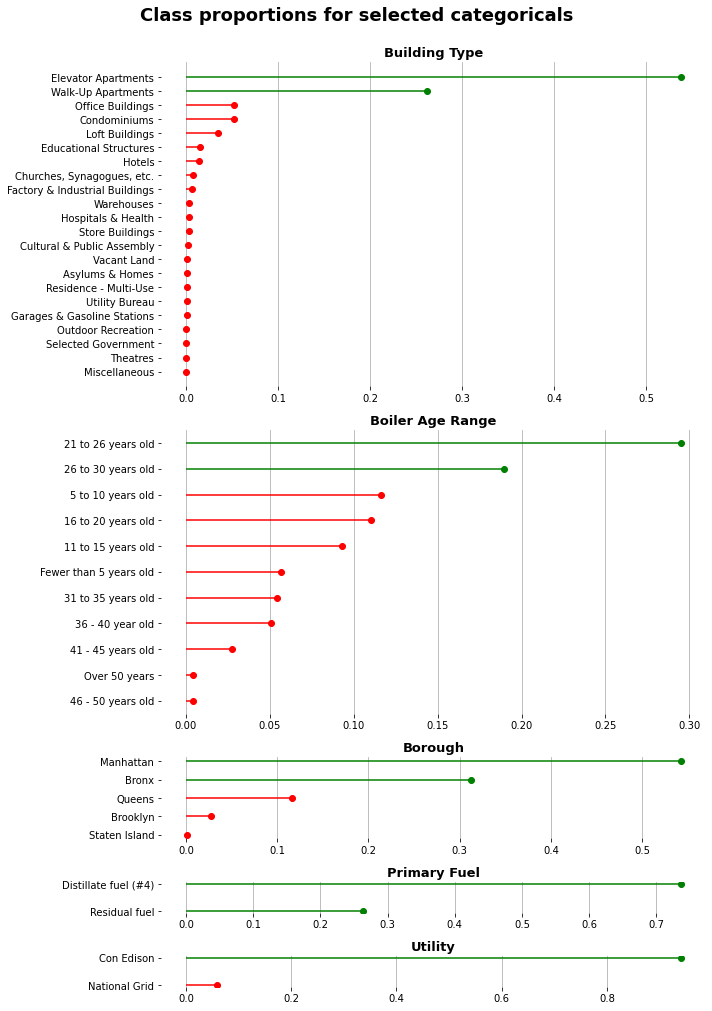

In [8]:
PROP_THRESH = 0.15

fig_catcount, ax_catcount = plt.subplots(5,
                                         #sharex=True,
                                         figsize=(10, 14),
                                         gridspec_kw={"height_ratios": [16, 14, 4, 1.5, 1.5]})

for col, ax in zip(["building_type",
                    "boiler_age_range",
                    "borough",
                    "primary_fuel",
                    "utility"],
                   ax_catcount.flat):

    # Proportions are cleaner.
    prop_cat = clean_heat[col].value_counts(normalize=True)
    prop_cat.sort_values(inplace=True)

    # We'll use different colors to draw attention to low proportions
    colors = ["red" if prop <= PROP_THRESH else "green" for prop in prop_cat]
    ax.hlines(prop_cat.index, xmin=0, xmax=prop_cat, colors=colors)
    
    # We can probably make this cleaner.
    # Plot the circles for each based on whether they're too small or not.
    # Maybe change the colors later?
    prop_small = prop_cat[prop_cat <= PROP_THRESH]
    prop_ok = prop_cat[prop_cat > PROP_THRESH]
    ax.plot(prop_small, prop_small.index, 'or',
            prop_ok, prop_ok.index, 'og')
    
    # Labels and customization
    ax.set_title(col.replace('_', ' ').title(),
                 {"size": 13,
                  "weight": "bold"})
    # We don't need axis labels
    ax.set_xlabel("")
    ax.set_ylabel("")
    # We only need an x grid rather than both.
    ax.grid(axis="x")
    ax.set_axisbelow(True)
    ax.set_frame_on(False)

# Figure customization
fig_catcount.suptitle("Class proportions for selected categoricals",
                      y=1,
                      fontproperties={"size": 18,
                                      "weight": "bold"})
fig_catcount.tight_layout()

The plot above shows the proportion of classes for selected categorical variables. Green lines indicate classes that make up at least 16% of the variable while red is 15% and under.

**Questions:** (You don't have to answer all of them.)

* Which variables have class issues and why?
* Is a 15% threshold too low?
* How might greatly unbalanced classes affect analysis?
* How may we fix these variables (if they're repairable)?

## Distribution of selected numerical variables

One of the most useful EDA techniques is to plot the distributions of numerical variables. Histograms or KDE (density) plots visualize the full range of data. KDE plots estimate the density of a variable which effectively simulates observations.

Rug plots display where the actual observations lay under the density estimate. Density and rug plots are a powerful combination!

Let's take a look at both.

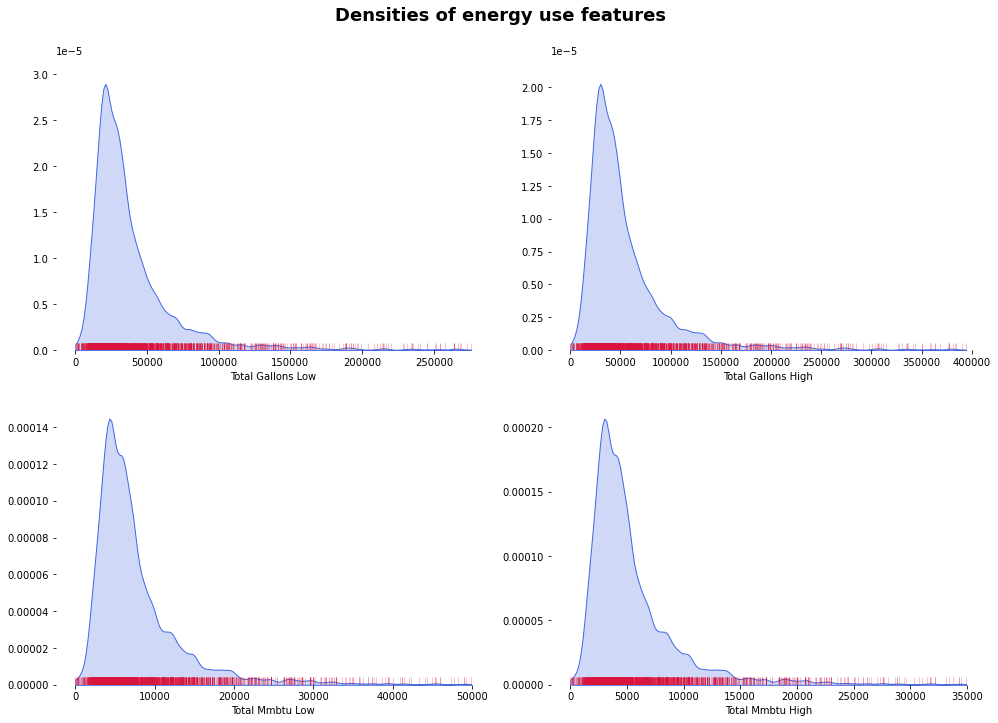

In [9]:
fig_gal_dist, axes_gal_dist = plt.subplots(2, 2, figsize=(14, 10))

for col, ax in zip(["total_gallons_low", "total_gallons_high",
                   "total_mmbtu_low", "total_mmbtu_high"],
                  axes_gal_dist.flat):
    
    # KDE plot showing the full range of data.
    # The estimation process is cut off to prevent negative values.
    sns.kdeplot(x=col,
                cut=0,
                ax=ax,
                bw_adjust=0.5,
                color="royalblue",
                fill=True,
                data=clean_heat)
    
    # Rug plot showing the actual data points.
    sns.rugplot(x=col,
                ax=ax,
                data=clean_heat,
                color="crimson",
                alpha=.25)
    
    ax.set_xlabel(col.replace('_', ' ').title())
    # Label is clear from title.
    ax.set_ylabel("")
    ax.set_frame_on(False)

# Figure titles
fig_gal_dist.suptitle("Densities of energy use features",
                      y=1,
                      fontproperties={"size": 18,
                                      "weight": "bold"})
fig_gal_dist.tight_layout()

We can see exactly where the observations are from the rug plot (red) and density (blue). We used these plots to figure out missing and strange values. The density plot was heavily skewed to the right so that the density was squished to the left. We opted to conservatively drop data as we lack domain knowledge on boilers and energy use from heating. The values shown in the rug seem reasonable despite the obvious sparsity at the right tail.

## Scatter plot

Bi/multivariate plots, such as scatter plots, help visualize trends across more than one variable. Looking at trends visually helps us craft models because we can actually see our data laid out for us. Of course, plots aren't a substitute for rigorous analysis because visual trends may still fall within the margin of errors.

Our scatter plot shows a correlation between building size and gas use which is reasonable as well.

Text(0.5, 1.0, 'Average gallons vs. building size')

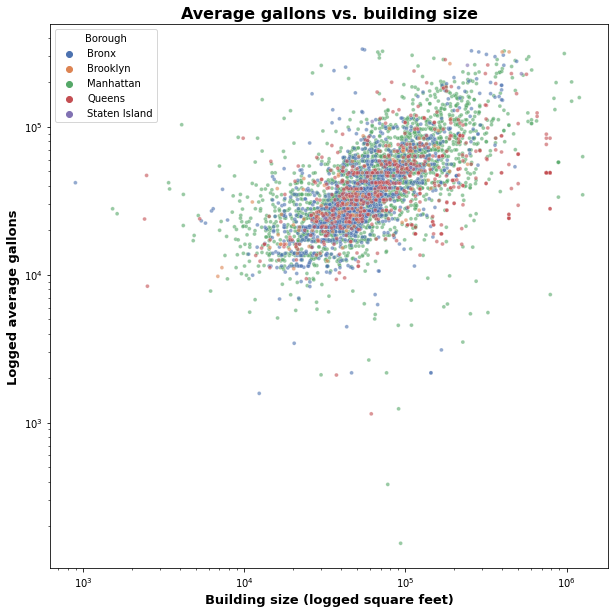

In [18]:
fig_sqft_gal, ax_sqft_gal = plt.subplots(figsize=(10, 10))

# Making this plot look good is...difficult.
# Maybe play with facets later.
sns.scatterplot(x="bldg_sqft",
                y="avg_gallons",
                hue="borough",
                palette="deep",
                alpha=0.6,
                data=clean_heat,
                ax=ax_sqft_gal,
                s=15)

# Log scale really helps due to the units
ax_sqft_gal.set_xscale("log")
ax_sqft_gal.set_yscale("log")

# Labels
ax_sqft_gal.get_legend().set_title("Borough")
ax_sqft_gal.set_xlabel("Building size (logged square feet)",
                       fontweight="bold",
                       fontsize=13)
ax_sqft_gal.set_ylabel("Logged average gallons",
                       fontweight="bold",
                       fontsize=13)
ax_sqft_gal.set_title("Average gallons vs. building size",
                      fontweight="bold",
                      fontsize=16)

![Supervised learning](https://www.simplilearn.com/ice9/free_resources_article_thumb/super.jpg)<a id=supervised></a>

## K-Nearest Neighbors (KNN)

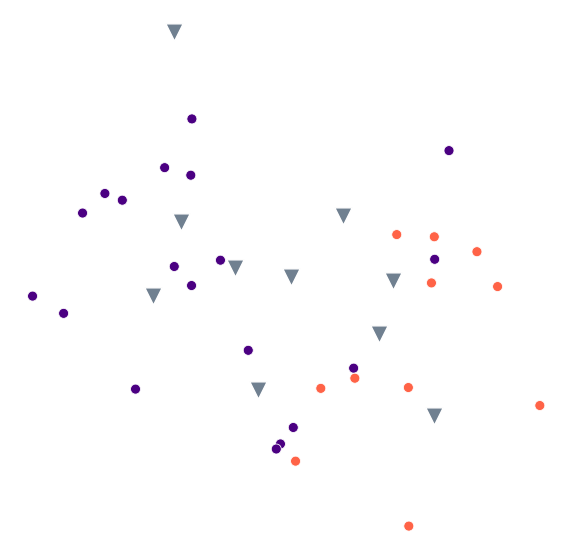

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

fig_knn_ex, ax_knn_ex = plt.subplots(figsize=(10, 10))

X_ex_knn, y_ex_knn = make_blobs([25, 15],
                                cluster_std=[6, 4.5],
                                random_state=42)

# We don't need the test set's labels
X_ex_train, X_ex_test, y_ex_train, _ = train_test_split(X_ex_knn,
                                                        y_ex_knn,
                                                        random_state=42)

# Plot the training set
sns.scatterplot(x=X_ex_train[:, 0],
                y=X_ex_train[:, 1],
                hue=y_ex_train,
                palette=["indigo", "tomato"],
                legend=False,
                ax=ax_knn_ex,
                s=100)

# And the test X
sns.scatterplot(x=X_ex_test[:, 0],
                y=X_ex_test[:, 1],
                color="slategray",
                ax=ax_knn_ex,
                s=300,
                #label="Test",
                marker="v")

# Eradicate all labels
ax_knn_ex.set_frame_on(False)
ax_knn_ex.set_axis_off()

KNN is simple yet performant supervised machine learning algorithm.

Let's say we have a classification problem where we're trying to label an unknown point, `p`, that may be _orange_ or _purple_. This point is on a 2D space (i.e. a graph like the scatter plot above) with other points on that graph. A reasonable approach is to look at `p`'s _nearest neighbors._ If the point is closest to more purple then we classify it as purple and vice versa for orange. We decide based on the `k` nearest neighbors. For example, if the point is near three orange with a `k` of five then we can reasonably assume that `p` is orange with a 60% chance (that is, $\frac{3}{5}=.6$). What if `p` is near five purple with a `k` of five? Then `p` is likely purple ($\frac{5}{5} = 1.0$). This process is known as **voting.**

KNN also works for regression. KNN regression calculates the mean of the nearest neighbors as a prediction instead of calculating the probability that a point is of a certain class.

KNN is that cliché: birds of a feather flock together. Despite the ostensible simplicity, KNN is a remarkably good algorithm. Let's look at a simple model to try out KNN.

## The scikit-learn workflow via a simple model

* Clean the data
* Split data into training and test sets
* Apply preprocessing such as scaling the variables to the **training set only**
* Choose a model type that best represents the problem domain
* Tune the model's hyper parameters
* Fit and test model's robustness on the test set (which will be scaled by the training set's parameters)

As mentioned earlier, our data set isn't really designed for prediction. However, we can still use what we have in order to demonstrate the models.

We already cleaned the data with the exception of handling missing values. Null values is a complicated topic in data as how we handle them is entirely dependent on the type of missing value as well as our problem. The worst technique is to fill the missings by the mean or median. Imputation is out of the scope of this workshop, so we'll drop the nulls for convenience.

### Training and testing sets

### Why?
ML models are tested on new or unseen data in order to quantify robustness. In other words, we need to test how well our model performs by using data beyond what was "learned." Thus, the data are split into **training** and **test** sets in order to fit the model to training set and quantify performance using the test set. **We do not touch the test set.** The test set shouldn't be used at all to influence to model. For example, you should standardize your training set _only_ rather than standardizing the entire data set at once. Standardizing the entire data set technically "leaks" information from the testing set into the training set. This is appropriately known as **data leakage**. Scikit-learn's `Pipeline` API mitigates data leakage for you by applying any scaling correctly.

### Sklearn's train_test_split

Let's split the data into training and set sets using scikit-learn. The function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) shuffles and splits data randomly. Key parameters include:

* The `X` (predictors) and `y` (response) data. The function can split an arbitrary number of arrays.
* `test_size`: a optional number or proportion that indicates the amount of data to include in the test set
* `train_size`: ditto for training
* `random_state`: random seed used to reproduce the split
* `shuffle`: randomly shuffle the data prior to splitting
* `stratify`: sample the data based on the strafication of a certain variable

The test size defaults to 25% of the data, but different splits may be applied as well. You also don't need to supply both the _test_size_ and _train_size_ parameters as _train_size_ defaults to the complement of _test_size_ and vice versa.

Stratification is useful when classes are imbalanced. For example, we may stratify on an imbalanced response for consistency or else we may end up with a training set that is missing some of the classes!

In [12]:
from sklearn.neighbors import KNeighborsClassifier

clean_heat_knn = clean_heat[["num_floors", "avg_gallons", "greener_greater_buildings"]].dropna()

X_train, X_test, y_train, y_test = train_test_split(clean_heat_knn.drop(columns=["greener_greater_buildings"]),
                                                    clean_heat_knn.greener_greater_buildings,
                                                    random_state=42)

We first import the required functions and classes. If we were doing a regression we would import [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) instead like so:

```python
from sklearn.neighbors import KNeighborsRegressor
```

We also already imported `train_test_split` earlier.

```python
from sklearn.model_selection import train_test_split
```

As discussed above, we have to drop `NaN`s from our columns. We selected the columns we need and dropped `NaN`s from the subset rather than drop nulls across the data set. Dropping nulls across the data set would throw away _much_ more data.

Finally, we call `train_test_split` and pass in our `X` and `y` with a `random_state` of 42 for reproducibility. We opted not to stratify on our target, `greener_greater_buildings`, because the mix between the categories is healthy.

We passed in `X` and `y` using a common technique that may look strange at first. For `X`, the first parameter, we drop the response column which returns a copy of the DataFrame without `greener_greater_buildings`. In other words, using `drop()` returns only our predictors. The alternative is to manually select each variable. For example, the following code is also viable.

```python
X_train, X_test, y_train, y_test = train_test_split(clean_heat_knn[["num_floors", "avg_gallons"]]),
                                                    clean_heat_knn.greener_greater_buildings,
                                                    random_state=42)
```

The second parameter is our `y` variable which is `greener_greater_buildings`, as you can see above.

Finally, the variable names `X_train`, `X_test`, `y_train`, and `y_test` are standard.

### Fitting (training) the model

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

Estimating the parameters used by a model from the data is known as fitting or training a model. For example, anyone familiar with linear regressions likely knows that the equation for the model is $\hat{y} = \hat{\beta_0} + \hat{\beta_1}X_1 + \hat{\beta_2}X_2..\hat{\beta_p}X_p + \epsilon$. Each $\beta$ is a parameter for a slope (or weight) or constant (i.e. intercept or dummy variable constant) that is learned from the data by minimizing a loss function, and $\epsilon$ is the irreducible error term.

Don't worry if this sounds complicated or the math looks scary. The point is that fitting is a process that "learns" parameters from the data. Some models, like the linear regression above, learn a few parameters while others are vastly more complicated. KNN's parameter is a decision boundary that separates the classes.

The first step is to create the KNN classifier object. We pass any tunable parameters (hyperparameters) to the classifier object. As you probably guessed, `n_neighbors` is the nearest neighbors hyperparameter. Hyperparameters are **not learned** by the model hence why they're "tunables." Instead, the research must tweak the hyperparameters based on their own knowledge of the model or data. Usually hyperparameters have a wide range such that ML algorithms can't "tune" them automatically. For example, `k` can essentially be any integer. Some hyperparameters can be all real numbers. Finally, we can also pass a different distance function to KNN, but that's out of the scope of this workshop.

Next up is fitting the model. All we have to do here is call `fit()` with the training sets for X and y.

Scikit-learn's model classes return the model object themselves. Thus, we can chain the method calls above rather than placing them on separate lines. For example, the line below are equivalent to the code above.

In [14]:
knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

### Scoring the model

Classification and regression both have **many** metrics to score performance. For classification, the simplest scoring metric is **accuracy** which is simply the proportion of correct positive and negative predictions. For example, 95% accuracy means that the model distinguished the classes correctly 95% of the time.

$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

$specificity = \frac{TN}{TN + FP}$

$sensitivity = \frac{TP}{TP + FN}$

**T** = True,

**F** = False,

**P** = Positive,

**N** = Negative


Thus TP = **True Positive**. You don't need to memorize these for this workshop.

Other score metrics determine the amount of correct positives _or_ the amount of correctly predicted negatives. This is out of the scope of the workshop, but understanding _why_ one may be concerned about just positive or negatives is important. A researcher may be building a model to predict a rare disease that affects only 0.01% of the population. A model can be 99.99% accurate by predicting the negative class each time. However, that's obviously a poor model for the researcher's situation! Thus, different metrics are useful depending on the research.

KNN's default `score()` function returns accuracy. Different model types have different default scorers. For example, ordinary least squares regression, ridge regression, and lasso regression all use $R^2$ as the default.

We can test the accuracy of the KNN model on both the training and test sets like so:

In [15]:
print(f"Training set score: {knn_clf.score(X_train, y_train)}")
print(f"Testing set score: {knn_clf.score(X_test, y_test)}")

Training set score: 0.8222600795002839
Testing set score: 0.787052810902896


Notice that the training score is higher than the testing score. We're witnessing a common problem known as **overfitting**. Models should be robust to new data (i.e. for predictions). However, models may be prone to learning the noise in a data set or may get caught up on minute details rather than the trend. Models should be able to generalize therefore a training set score higher than the testing is a clear problem.

Here's an analogy for the problem of overfitting. Imagine a student has a test and is given a pretest to study. The pretest has similar questions to the final test but with some differences. The student unwisely decides to memorize the pretest. During the final test the student fills in the memorized answers leading to a great big _zero_. The student overfit to the training test and failed the actual test.

Lower `k` is associated with model complexity which in turn is associated with overfitting. Higher `k` is simplifies the model but a too simple model _underfits_. Underfit models perform poorly all around.

So the question is...

### How do we choose the best k? (Elbow plots)

An intuitive method for finding the best `k` is the elbow plot. Elbow plots graph the training and test score for a range of `k`. You look for the "elbow" where the testing score is surpassing the training score. Elbow plots lack the finesse of more automated methods, but they're great tools for learning a simple model type like KNN.

We wrote an elbow plot function below. Writing your own would likely lead to a third of the code as most of the code below is to add labels and such.

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='k', ylabel='Accuracy'>)

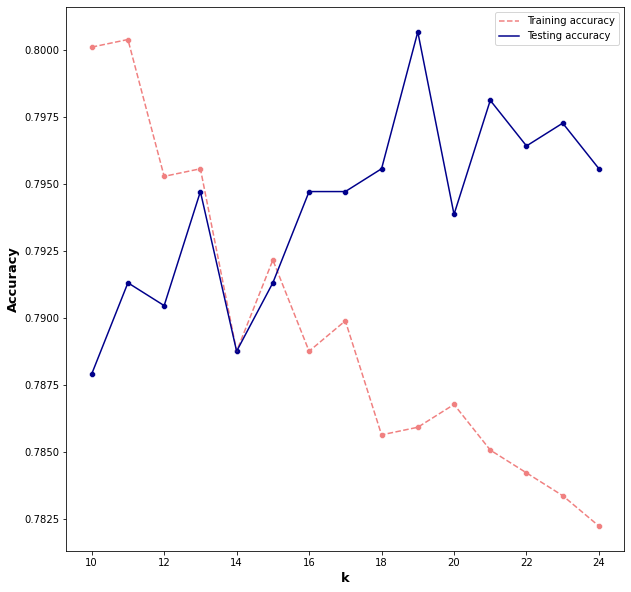

In [16]:
def elbow_plot(X_train, y_train, X_test, y_test, k_range=11):
    training_accuracy = []
    testing_accuracy = []
               
    if isinstance(k_range, int):
        k_range = list(range(1, k_range))
    else:
        k_range = list(k_range)
               
    label_style = {"weight": "bold",
                   "size": 13}
    
    # Calculate the training and test scores up to k_max - 1
    for k in k_range:
        knn = KNeighborsClassifier(k).fit(X_train, y_train)
        training_accuracy.append(knn.score(X_train, y_train))
        testing_accuracy.append(knn.score(X_test, y_test))
    
    # Plot both and label
    fig, ax = plt.subplots(figsize=(10, 10))
    # Training line and points
    sns.lineplot(x=k_range, y=training_accuracy,
                 color="lightcoral", ax=ax,
                 label="Training accuracy",
                 linestyle='--')
    sns.scatterplot(x=k_range, y=training_accuracy,
                    color="lightcoral", ax=ax)
    # Testing line and points
    sns.lineplot(x=k_range, y=testing_accuracy,
                 label="Testing accuracy",
                 color="darkblue", ax=ax)
    sns.scatterplot(x=k_range, y=testing_accuracy,
                    color="darkblue", ax=ax)
    ax.set_ylabel("Accuracy",
                  fontdict=label_style)
    ax.set_xlabel("k",
                  fontdict=label_style)
    
    return fig, ax

elbow_plot(X_train, y_train, X_test, y_test, range(10, 25))

### And now we have some caveats

As mentioned a few times by now, our data are not exactly the best for ML. However, the real world messiness is entertaining. While the elbow plot is very inconsistent we have an elbow of sorts at 15 or 16 while 17 or 18 seem like good choices of `k` (both are fairly high). Elbow plots are sometimes ambiguous as we see from the plot above. The plots would ideally have a clear "elbow." Realistically, you're unlikely to use KNN or plot elbow plots in the wild.

The next step after finding an optimal `k` is to refit the model with a new value of `n_neighbors`. But before we do that we should visualize the training and test points to get a feel at why low `k` learns the noise in a data set and why high `k` underfits. Plotting all of our data is a bit hard due to amount of observations.

Random data is simpler to visualize, so let's take take a quick detour to examine fake data!

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Random data with three classes'}>)

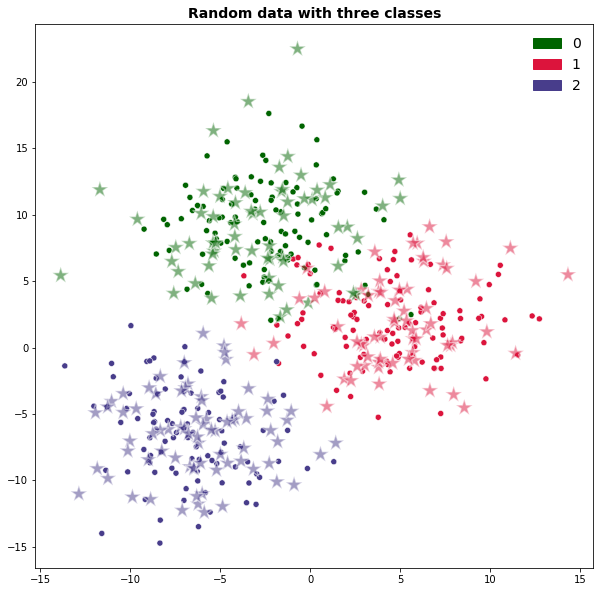

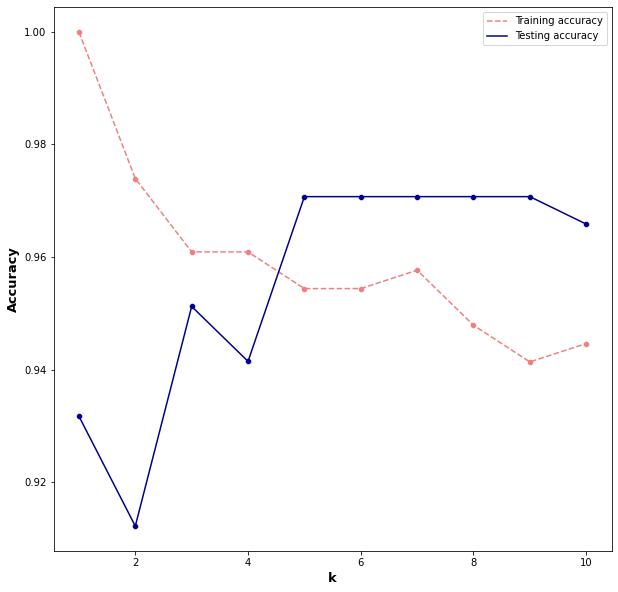

In [17]:
from matplotlib.patches import Patch

def random_data_test():
    # Generate random data. I toyed with the standard deviations to ensure
    # some mixing with a clear elbow plot.
    X, y = make_blobs(512,
                      cluster_std=[3.5, 3.14, 3.24],
                      random_state=42)    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=.4,
                                                        random_state=42)
    
    # Overengineered colors solution
    # This can be simplified since I'm not coloring the test points in
    # gray anymore.
    colors_labs = {"0": "darkgreen",
                   "1": "crimson",
                   "2": "darkslateblue"}
                   #"Test": "slategray"}
    colors = list(colors_labs.values())
        
    fig, ax = plt.subplots(figsize=(10, 10))
    # Training set
    sns.scatterplot(x=X_train[:, 0],
                    y=X_train[:, 1],
                    hue=y_train,
                    palette=colors,
                    legend=False,
                    ax=ax)
    # Unlabeled test points as stars
    sns.scatterplot(x=X_test[:, 0],
                    y=X_test[:, 1],
                    hue=y_test,
                    palette=colors,
                    alpha=0.5,
                    ax=ax,
                    marker="*",
                    s=300)
    
    # Labels and legend
    ax.set_title("Random data with three classes",
                 fontweight="bold",
                 fontsize=14)
    
    handles = [Patch(color=pair[1], label=pair[0]) for pair in colors_labs.items()]
    ax.legend(handles=handles,
              loc="upper right",
              fontsize=14,
              frameon=False)
        
    # Elbow plot to visualize best k
    elbow_plot(X_train, y_train, X_test, y_test)
    
    return fig, ax

random_data_test()

Generating random data is useful, right? Notice how the training set is perfectly accurate with `n_neighbors=1` but steadily decreases for higher levels of `k`. Eventually, our plots shows an elbow at `n_neighbors=5` where the testing accuracy score surpasses the training score and remains like that for several `k`.

We don't show what happens beyond a `k` of 9, but if anyone is curious the model eventually underfits and both scores plummet.

Regardless, the plotted generated data helps us see how a KNN model with fit. We can see that `n_neighbors=1` would incorrectly predict several testing points for example. The plot also shows that some error on the testing set is inevitable because we have strange observations that are far from their classes in the data space. This is known as irreducible error, and irreducible error is a fact of life.

### The end of a dive into KNN

By now we discussed several facets of KNN yet we can go on ad nauseam about characteristics of the model. Hopefully you can see both the simplicity and the complexities of ML in general from this small model. KNN is simple to implement by hand as you essentially just calculate the distance between your new point and your training data then calculate the probability using the `k` neighbors with the lowest distances. Much of ML is simple to explain in words while having endless complexities in crafting models themselves.

We weren't able to include more details on hot topics such as **feature engineering**, **scaling**, or **cross validation** in this section despite both being important parts of the ML process. We did not cover how to encode categoricals either. The scale of ML is vast!

Scikit-learn makes it easy to swap and play with models as discussed earlier. Each model class follows the same paradigm of `fit()` and `predict()` which allows researchers and programmers to focus on the problem domain. KNN has a lot of problems. For example, linear models outperform KNN in higher dimensions. KNN is a slow algorithm, especially in higher dimensions. KNN is sensitive to features, scaling, and the distance metric. KNN is fun to talk about but impractical in many situations. Let's fit another algorithm using the same data just because it's easy.

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=3.9,
                                n_jobs=-1,
                                random_state=42).fit(X_train, y_train)

print(f"Random forests training score: {rf_clf.score(X_train, y_train)}")
print(f"Random forests testing score: {rf_clf.score(X_test, y_test)}")

Random forests training score: 0.8029528676888131
Random forests testing score: 0.8160136286201022


Of course, fitting models pseudorandomly is silly. However, random forests outperformed KNN in the example above despite incorrect use which is always fun to see. Domain knowledge about the model types as well as choosing hyperparameters is important. But sklearn's breezy API allows us to swap models with ease.

While scaling is out of the scope of our workshop, we'll show a small code snippet below of how to automatically scale data using scikit-learn below. The gist of it is that scaling data transforms each observation to a z-score so that units are easier to compare across features. Many algorithms are sensitive to unscaled variables, including KNN.

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

knn_clf_pipe = make_pipeline(StandardScaler(),
                             KNeighborsClassifier(16))

knn_clf_pipe.fit(X_train, y_train)
print(f"KNN with scaled vars training score: {knn_clf_pipe.score(X_train, y_train)}")
print(f"KNN with scaled vars testing score: {knn_clf_pipe.score(X_test, y_test)}")

KNN with scaled vars training score: 0.8157296990346394
KNN with scaled vars testing score: 0.8228279386712095


Our model correctly identifies buildings that are part of the Greener, Greater Buildings program with an ~82% accuracy. With more data, features, and a more robust classifier, a model that mathematically predicts which buildings should be part of the GGB program could be very useful. Future programs that involve buildings could benefit from greater data collection and models to determine which are included in the program.

### Try it yourself 

Try fitting a KNN model yourself. You should stick to classification here to be directly relevant to the introduction above. The process you'll take is:

* Choose `X` and `y` variables
* Split the variables using `train_test_split`
* Find an appropriate `k` using our `elbow_plot()` function.
* Create a KNN classifier using the optimal `k`.
* Print the train and test scores

Note that there are fill in the blank statements below as well.

**Variables to consider for X:**
* `boiler_installation_date`
* `est_retire_year`
* `total_gallons_high`
* `total_gallons_low`
* `total_mmbtu_high`
* `total_mmbtu_low`
* `bldg_sqft`
* `total_units`
* `num_floors`
* `num_res_units`

**Variables to consider for y:**
* `borough`
* `primary_fuel`
* `greener_greater_buildings`

Choose **two or more** X and **only one** y.

In [ ]:
# Choose two or more variables here.
my_X = ["first variable", "second variable", "more? or remove this String"]
# And a categorical here.
my_y = ["categorical variable"]

# Next we'll split the variables into training and test sets.
# What are the common names for the variables below?
X_train, _____, _____, y_test = train_test_split(clean_heat[my_X],
                                                 clean_heat[my_y],
                                                 test_size=___, # Don't forget about your test size!
                                                 random_state=42)

# Now let's make our elbow plot.
# Fill in the blanks including a range of k
# Do NOT put a massive range...unless you're like on a gaming computer or something.
# Try increments of 10 or so.
elbow_plot(_____, # Training predictors
           _____, # Training response
           _____, # Testing predictors
           _____, # Testing response
           range(1, 11)) # Replace as needed

# What is your best k (approximately)?
my_knn = KNeighborsClassifier(n_neighbors=_____)
my_knn.fit(_____, y_train)

# And now let's test your model!
print(f"My model's training score: {my_knn.score(X_train, y_train)}")
print(f"My model's testing score: {my_knn.score(X_test, y_test)}")

![Unsupervised learning](https://www.simplilearn.com/ice9/free_resources_article_thumb/unsup.jpg)<a id=unsupervised></a>

# Unsupervised learning

Unsupervised learning discovers latent trends in unlabeled data. For example, unsupervised learning can help detect malware or incoming attacks even if the data are unlabeled. Anamalous traffic that doesn't fit a pattern can be detected as malicious. Another use is clustering similar items and users together to form a recommendation system.

In this section we'll cover k means clustering which we'll apply to our clean heat data set.

## K means clustering

K means categorizes data into `k` clusters where `k` is a hyperparameter. K means assumes that observations in a cluster are closer to their cluster center than other clusters. The cluster center is the average of the points in that cluster.

Let's take a look at an example using fake data again.

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:title={'center':'K means with five clusters'}>)

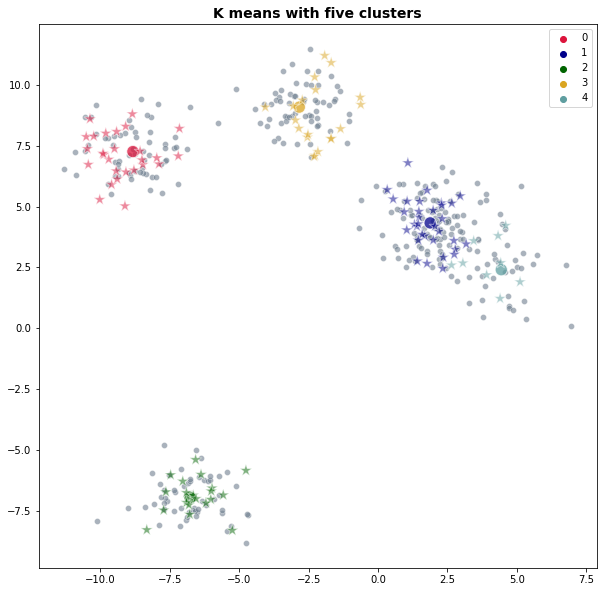

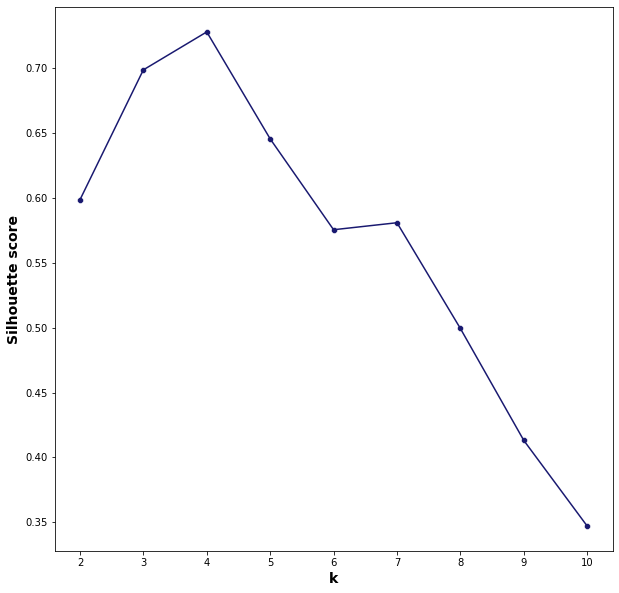

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def silhouette_plot(X_train, k_range=range(2, 11)):
    k_range = list(k_range)
    scores = []
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)
    
    for k in k_range:
        km = KMeans(k, random_state=42).fit(X_scaled)
        scores.append(silhouette_score(X_scaled,
                                       km.predict(X_scaled),
                                       random_state=42))
    
    # Plot silhouette score
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.lineplot(x=k_range,
                 y=scores,
                 color="midnightblue",
                 ax=ax)
    sns.scatterplot(x=k_range,
                    y=scores,
                    color="midnightblue",
                    ax=ax)
    ax.set_xlabel("k", fontweight="bold", fontsize=14)
    ax.set_ylabel("Silhouette score", fontweight="bold", fontsize=14)
    
    return fig, ax

def kmeans_plot():
    # Random data again
    # We don't actually need the y labels so let's tell the interpreter
    # to ignore the variable.
    X, _y = make_blobs([80, 35, 75, 90, 150],
                      random_state=42)
    X_train, X_test = train_test_split(X,
                                       random_state=42)
    
    # Train KMeans to predict labels
    km = KMeans(n_clusters=5,
                random_state=42).fit(X_train, y_train)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    colors = ["crimson",
              "darkblue",
              "darkgreen",
              "goldenrod",
              "cadetblue"]
    # Plot the unlabeled training set
    sns.scatterplot(x=X_train[:, 0],
                    y=X_train[:, 1],
                    color="slategray",
                    alpha=0.6,
                    ax=ax)
    
    # Plot the centroids
    sns.scatterplot(x=km.cluster_centers_[:, 0],
                    y=km.cluster_centers_[:, 1],
                    hue=list(range(0, 5)),
                    palette=colors,
                    alpha=.75,
                    ax=ax,
                    s=150)
    
    # Plot the testing set with labels
    y_labels = km.predict(X_test)
    sns.scatterplot(x=X_test[:, 0],
                    y=X_test[:, 1],
                    hue=y_labels,
                    palette=colors,
                    alpha=.5,
                    legend=False,
                    ax=ax,
                    marker="*",
                    s=150)
    
    # Labels
    ax.set_title("K means with five clusters",
                 fontweight="bold",
                 fontsize=14)
    
    silhouette_plot(X_train)
    
    return fig, ax
    
kmeans_plot()

The large, colored circles represent the cluster centers. Each colored star is a test point that was labeled by k means. You may be asking yourself about the difference between KNN and k means. KNN assigns labels (or outputs continuous values) based on the nearest neighbors. K means labels data points into `k` groups. KNN uses labeled data whereas k means automatically creates groups.

Silhouette scores are a metric for determining how well k means fits with a certain `k`. Essentially, the score is a measure of how well the observations fit into the assigned cluster. The score ranges from **-1 to 1** where positive values indicate better separation of the clusters and cohesion within the clusters while negative values imply a total mess.

Interestingly, despite generating five random clusters, **four clusters** perform better according to the silhouette plot. Plotting the random data shows that at least two clusters are very close together to the point where they're basically one cluster hence why four performs best.

Now let's look at our actual data!

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='k', ylabel='Silhouette score'>)

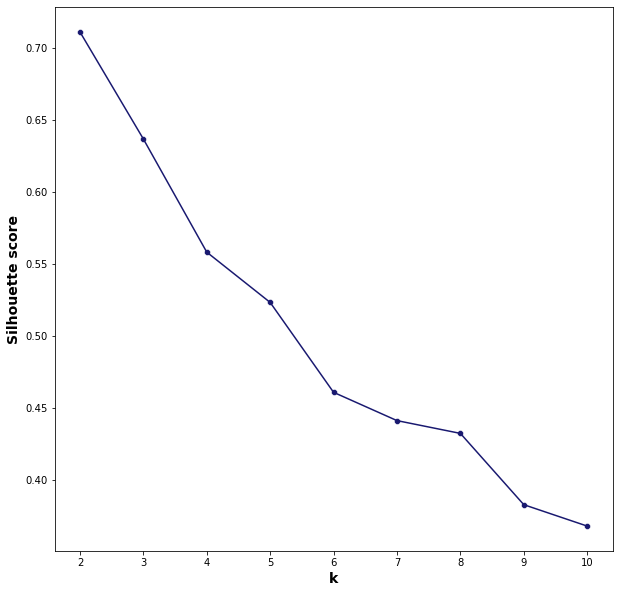

In [21]:
X_train, X_test = train_test_split(clean_heat[["avg_gallons", "bldg_sqft"]].dropna(),
                                   random_state=42)

silhouette_plot(X_train)

The highest silhouette is associated with `k = 2`. Let's examine these clusters graphically now!

Text(0, 0.5, 'Scaled square feet')

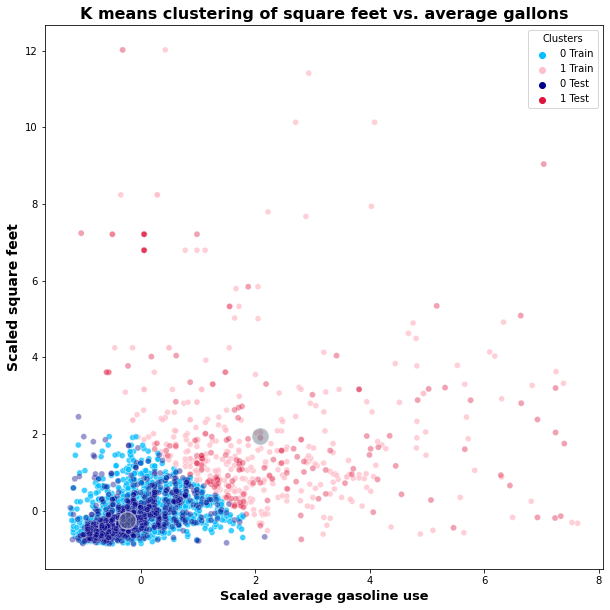

In [22]:
# We'll need to scale both the training and the test set
scaler_km = StandardScaler()
X_train_scaled = scaler_km.fit_transform(X_train)
# Scaling X_test with X_train's parameters
X_test_scaled = scaler_km.transform(X_test)
# And fit k means on the scaled data
km = KMeans(2, random_state=42).fit(X_train_scaled)

# Plots!
fig_kmeans, ax_kmeans = plt.subplots(figsize=(10, 10))

# Training labels
sns.scatterplot(x=X_train_scaled[:, 0],
                y=X_train_scaled[:, 1],
                hue=km.labels_,
                palette=["deepskyblue", "pink"],
                alpha=0.75,
                ax=ax_kmeans)

# Test labels
sns.scatterplot(x=X_test_scaled[:, 0],
                y=X_test_scaled[:, 1],
                hue=km.predict(X_test_scaled),
                palette=["darkblue", "crimson"],
                alpha=0.4,
                ax=ax_kmeans)

# Cluster centers
sns.scatterplot(x=km.cluster_centers_[:, 0],
                y=km.cluster_centers_[:, 1],
                color="slategray",
                alpha=.5,
                legend=False,
                ax=ax_kmeans,
                s=300)

# Labels et cetera
legend_kmeans = ax_kmeans.get_legend()
legend_kmeans.set_title("Clusters")
# There's probably a neater way to handle this.
for lab, txt in zip(legend_kmeans.get_texts(),
                    [" Train", " Train", " Test", " Test"]):
    lab.set_text(lab.get_text() + txt)
    
ax_kmeans.set_title("K means clustering of square feet vs. average gallons",
                    fontweight="bold",
                    fontsize=16)
ax_kmeans.set_xlabel("Scaled average gasoline use",
                     fontweight="bold",
                     fontsize=13)
ax_kmeans.set_ylabel("Scaled square feet",
                     fontweight="bold",
                     fontsize=14)

The two clusters are represented by blues and reds. The lighter colors are the training set while the darker hues are testing. Gray circles are plotted to indicate the cluster centers.

All five elements together show how k means split the data into two clusters. The two clusters are pretty well defined and look logical as well. Smaller buildings with lower heating are split into the first cluster while the second cluster consists of larger buildings with higher energy use.

Unlike KNN, the two clusters were determined entirely from the properties of the data. One potential use of clustering with these data is to cluster buildings based on their heating use and size. This could provide a different criterion for buildings that should be working toward lowering their energy use.

# Thanks for joining us!<a id=conclusion></a>

By this point we covered two simple ML algorithms. You've seen the basic steps behind an ML project as well as examples of how one would undertake these steps. You've also learned some terminology such as what it means to fit a model. We introduced KNN and k means along with plots showing how they tic. Now what?

Despite the elementary algorithms, you can hopefully see how an ML pipeline may contribute to New York or even your jobs.

## A list of use cases

* Automatically clustering buildings or organizations by energy use and other features to help the city focus on problem areas.
* Allowing citizens to report problems by text or image and have those automatically classified for review by a professional. For example, pot holes, trash, weather related issues, utility problems, or even crime.
* Determining potential traffic jams based on time, weather, and other features; automatically reporting those issues publicly so that people can adjust.
* Predicting neighborhood booms to help adjust resources.
* Determine underserved areas (where underserved is a variety of critia).
* Smart grid systems.
* Detecting decaying or dangerous trees.

The data or capability for many of these are lacking while others are implemented in some way. However the potential exists for great improvements, especially since New York already collects and publishes data that scientists may use.

## Questions? Comments?

**Workshop hosted by:**
* [Habiba Aziz](https://github.com/habibaaziz/)
* [Josh Megnauth](https://github.com/joshuamegnauth54/)

Feel free to add us on GitHub! Have a great day!